In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import empyrical
from scipy import stats
%matplotlib inline

In [91]:
FOF_DIR = 'D:/workspace/data/FOF'

In [92]:
df = pd.read_pickle('%s/stock_return.pkl'%(FOF_DIR))

In [93]:
df.tail()

,000042.OF,000051.OF,000059.OF,000082.OF,000176.OF,000309.OF,000311.OF,000312.OF,000368.OF,000373.OF,...,540010.OF,540012.OF,585001.OF,590007.OF,660008.OF,660011.OF,673090.OF,690008.OF,700002.OF,740101.OF
2018-07-09,0.028252,0.027076,0.031906,0.029484,0.028591,0.026762,0.030922,0.027738,0.025260,0.031735,...,0.038151,0.027337,0.026112,0.025668,0.026404,0.021136,0.030854,0.021084,0.032463,0.026157
2018-07-10,0.005727,0.002636,0.007979,0.005569,0.003756,-0.003179,0.004821,0.001883,0.003408,0.007519,...,0.010709,0.001039,0.007540,0.006257,0.002820,0.005617,0.005146,0.011799,0.005468,0.003922
2018-07-11,-0.016315,-0.016652,-0.008312,-0.012658,-0.016050,-0.021046,-0.014925,-0.015871,-0.015143,-0.003392,...,-0.024491,-0.016960,-0.014967,-0.013472,-0.016022,-0.018441,-0.011180,-0.017493,-0.020394,-0.013672
2018-07-12,0.022699,0.022282,0.025843,0.022436,0.022989,0.029316,0.024351,0.022068,0.022345,0.022464,...,0.039171,0.020844,0.027540,0.024160,0.021826,0.025647,0.025148,0.014837,0.027065,0.022772
2018-07-13,0.007186,0.004359,0.015952,0.005486,0.005618,0.001899,0.006867,0.006298,0.007520,0.018642,...,0.017819,0.003104,0.008318,0.007179,0.004323,0.006004,0.013812,0.002924,0.008108,0.008712


In [94]:
df = df[df.index >= '2016-03-01']

In [95]:
df = df.dropna(axis=1)

In [96]:
df.tail()

,000042.OF,000051.OF,000059.OF,000082.OF,000176.OF,000309.OF,000311.OF,000312.OF,000368.OF,000373.OF,...,540009.OF,540010.OF,540012.OF,585001.OF,590007.OF,660008.OF,660011.OF,690008.OF,700002.OF,740101.OF
2018-07-09,0.028252,0.027076,0.031906,0.029484,0.028591,0.026762,0.030922,0.027738,0.025260,0.031735,...,0.024434,0.038151,0.027337,0.026112,0.025668,0.026404,0.021136,0.021084,0.032463,0.026157
2018-07-10,0.005727,0.002636,0.007979,0.005569,0.003756,-0.003179,0.004821,0.001883,0.003408,0.007519,...,0.007744,0.010709,0.001039,0.007540,0.006257,0.002820,0.005617,0.011799,0.005468,0.003922
2018-07-11,-0.016315,-0.016652,-0.008312,-0.012658,-0.016050,-0.021046,-0.014925,-0.015871,-0.015143,-0.003392,...,-0.015061,-0.024491,-0.016960,-0.014967,-0.013472,-0.016022,-0.018441,-0.017493,-0.020394,-0.013672
2018-07-12,0.022699,0.022282,0.025843,0.022436,0.022989,0.029316,0.024351,0.022068,0.022345,0.022464,...,0.016852,0.039171,0.020844,0.027540,0.024160,0.021826,0.025647,0.014837,0.027065,0.022772
2018-07-13,0.007186,0.004359,0.015952,0.005486,0.005618,0.001899,0.006867,0.006298,0.007520,0.018642,...,0.005320,0.017819,0.003104,0.008318,0.007179,0.004323,0.006004,0.002924,0.008108,0.008712


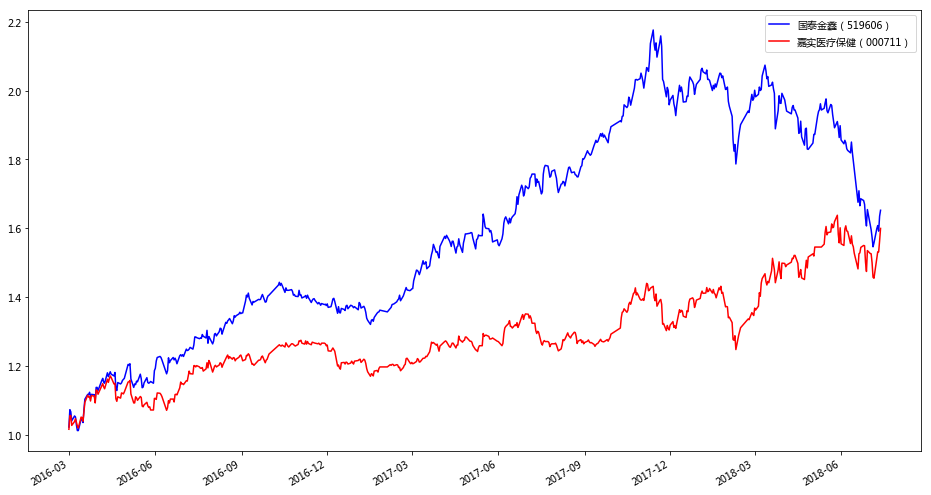

In [116]:
code, code2 = '519606.OF', '000711.OF'
(1+df[code]).cumprod().plot(figsize=(16, 9), color='blue', label=u'国泰金鑫（519606）')
(1+df[code2]).cumprod().plot(figsize=(16, 9), color='red', label=u'嘉实医疗保健（000711）')
plt.legend()

In [113]:
mdf = pd.DataFrame(index=df.columns, 
                   columns=['return', 'vol', 'mean', 'std', 'skewness', 'kurtosis', 'sharpe', 'omega', 'mdd'])
for col in df.columns:
    mdf.loc[col, 'return'] = empyrical.annual_return(df[col])
    mdf.loc[col, 'vol'] = empyrical.annual_volatility(df[col])
    mdf.loc[col, 'sharpe'] = empyrical.sharpe_ratio(df[col])
    mdf.loc[col, 'mean'] = df[col].mean()
    mdf.loc[col, 'std'] = df[col].std()
    mdf.loc[col, 'mdd'] = empyrical.max_drawdown(df[col])
    mdf.loc[col, 'omega'] = empyrical.omega_ratio(df[col])
    mdf.loc[col, 'skewness'] = stats.skew(df[col])
    mdf.loc[col, 'kurtosis'] = stats.kurtosis(df[col])

In [100]:
mdf = mdf.sort_values('sharpe', ascending=False)
mdf['sharpe rank'] = range(1, mdf.shape[0] + 1)
mdf = mdf.sort_values('omega', ascending=False)
mdf['omega rank'] = range(1, mdf.shape[0] + 1)
mdf['rank diff'] = mdf['sharpe rank'] - mdf['omega rank']

In [117]:
# mdf.sort_values('sharpe', ascending=False).head(50)

In [118]:
code, code2 = '519606.OF', '000711.OF'

In [119]:
mdf.loc[code]

return         0.243307
vol            0.199148
mean        0.000943135
std           0.0125451
skewness      -0.100405
kurtosis        2.14145
sharpe          1.19343
omega           1.22955
mdd           -0.289498
Name: 519606.OF, dtype: object

In [120]:
mdf.loc[code2]

return         0.225937
vol            0.184458
mean        0.000876042
std           0.0116197
skewness      -0.014212
kurtosis        1.92032
sharpe          1.19682
omega           1.24109
mdd           -0.133593
Name: 000711.OF, dtype: object

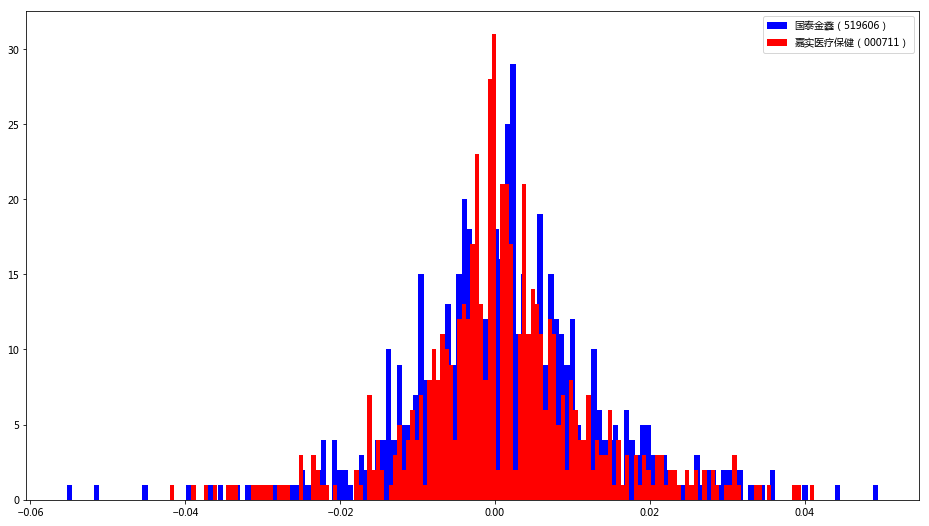

In [132]:
plt.figure(figsize=(16, 9))
plt.hist(df[code], 150, color='blue', label=u'国泰金鑫（519606）')
plt.hist(df[code2], 150, color='red', label=u'嘉实医疗保健（000711）')
plt.legend()